In [9]:
import pandas as pd

#loading the dataset
df = pd.read_csv('PCA_practice_dataset.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,-0.03125,0.236364,0.238095,-0.090909,0.000000,0.381818,0.326316,-0.015625,-0.12500,0.553398,0.431579,-0.015625,0.000000,0.461538,0.413043,0.000000,-0.03125,0.553398,0.493976,0.008130,-0.015385,0.553398,0.511111,0.072,-0.18750,0.576923,0.471264,-0.033333,-0.046154,0.524752,0.410526,-0.015625,-0.18750,0.495146,0.515789
1,-0.03125,0.309091,0.380952,0.074380,0.129032,0.472727,0.557895,0.078125,-0.03125,0.398058,0.263158,0.015625,-0.032258,0.442308,0.326087,0.033898,-0.06250,0.533981,0.397590,-0.024390,-0.138462,0.359223,0.422222,-0.024,0.00000,0.519231,0.425287,0.000000,0.138462,0.663366,0.368421,0.015625,0.12500,0.533981,0.368421
2,-0.03125,0.381818,0.261905,-0.107438,0.000000,0.527273,0.326316,0.046875,-0.03125,0.631068,0.536842,0.109375,-0.258065,0.230769,0.021739,-0.237288,-0.18750,0.495146,0.253012,-0.105691,-0.046154,0.669903,0.600000,0.072,0.09375,0.384615,0.103448,-0.250000,-0.138462,0.425743,0.263158,-0.109375,-0.03125,0.650485,0.452632
3,-0.03125,0.381818,0.285714,-0.123967,-0.129032,0.309091,0.073684,-0.156250,0.09375,0.398058,0.073684,-0.218750,-0.032258,0.615385,0.434783,0.033898,-0.15625,0.533981,0.397590,-0.089431,-0.261538,0.262136,0.222222,-0.184,-0.12500,0.519231,0.425287,-0.050000,-0.107692,0.485149,0.368421,-0.031250,-0.25000,0.203883,0.094737
4,-0.03125,0.381818,0.357143,-0.024793,-0.096774,0.454545,0.431579,-0.015625,-0.25000,0.398058,0.136842,-0.125000,0.000000,0.538462,0.413043,0.067797,-0.03125,0.553398,0.493976,0.008130,-0.261538,0.553398,0.400000,0.008,-0.06250,0.480769,0.471264,-0.033333,-0.169231,0.524752,0.515789,-0.015625,-0.28125,0.495146,0.410526


In [10]:
from sklearn.preprocessing import StandardScaler

#standardizing the features of the dataset
sc = StandardScaler()
df_std = sc.fit_transform(df)

In [11]:
import numpy as np

#constructing the covariance matrix. The covariance matrix stores the pairwise covariances between the different features
cov_mat = np.cov(df_std.T)

#computing the eigenvectors and eigenvalues of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [12]:
# Making a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sorting the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [16]:
import matplotlib.pyplot as plt

CASE :  1
Thereshold for this case =  0.9
The Scree plot for this case is:


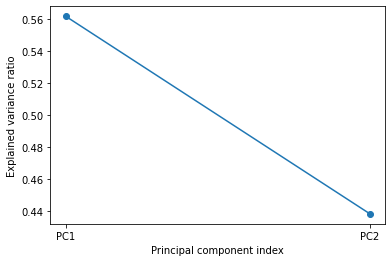

The number of principal components retained due to the thresholding =  2
CASE :  2
Thereshold for this case =  0.91
The Scree plot for this case is:


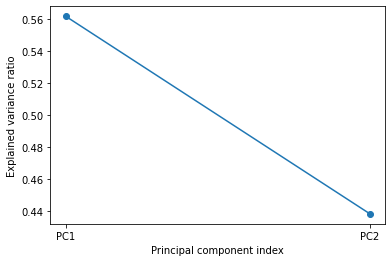

The number of principal components retained due to the thresholding =  2
CASE :  3
Thereshold for this case =  0.92
The Scree plot for this case is:


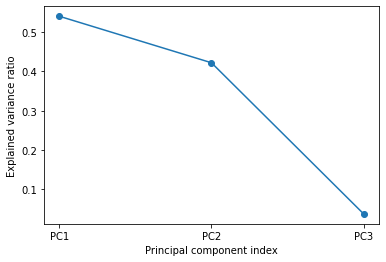

The number of principal components retained due to the thresholding =  3
CASE :  4
Thereshold for this case =  0.93
The Scree plot for this case is:


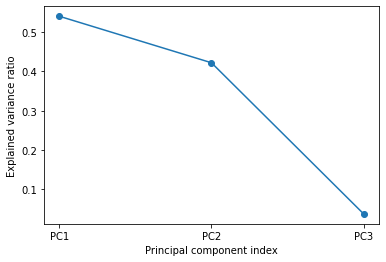

The number of principal components retained due to the thresholding =  3
CASE :  5
Thereshold for this case =  0.9400000000000001
The Scree plot for this case is:


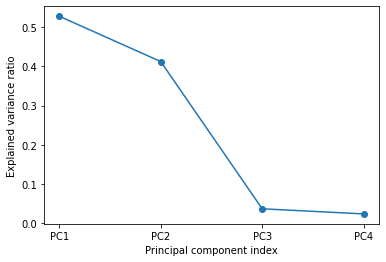

The number of principal components retained due to the thresholding =  4
CASE :  6
Thereshold for this case =  0.9500000000000001
The Scree plot for this case is:


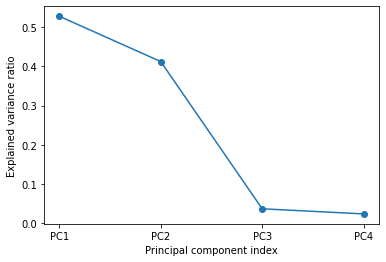

The number of principal components retained due to the thresholding =  4
CASE :  7
Thereshold for this case =  0.96
The Scree plot for this case is:


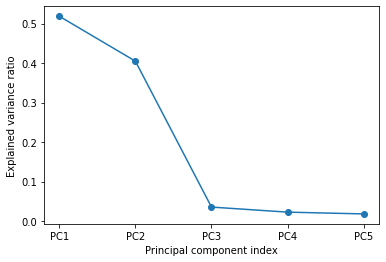

The number of principal components retained due to the thresholding =  5
CASE :  8
Thereshold for this case =  0.97
The Scree plot for this case is:


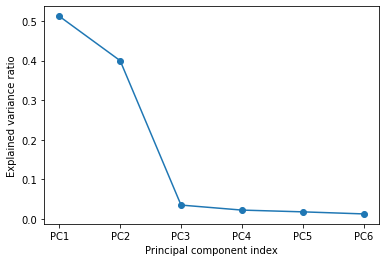

The number of principal components retained due to the thresholding =  6


In [45]:
for step in range(8):
  print('CASE : ',step+1)

  # Calculating the thereshold from the step number (initial thereshold is 0.9 and the step size is 0.01)
  thereshold = 0.9+(step*0.01)

  print('Thereshold for this case = ',thereshold)
  pc_vec = []

  sum_total_eigen_values = np.sum([i[0] for i in eigen_pairs])
  sum_sel_eigen_values = 0

  # From the sorted list of eigenpairs, we pick the eigenvectors in order such that the sum of the variance explained ratio of an eigenvalues of the selected eigenvectors is just less than (or equal to) the thereshold.
  # The variance explained ratio of an eigenvalue is simply the fraction of an eigenvalue and the total sum of the eigenvalues  
  for i in range(len(eigen_pairs)):
    sum_sel_eigen_values = sum_sel_eigen_values + eigen_pairs[i][0]
    if((sum_sel_eigen_values / sum_total_eigen_values)<= thereshold):
      pc_vec.append(eigen_pairs[i][1][:, np.newaxis])
    else:
      break

  # We stack the sequence of selected eigenvectors horizontally (i.e. column wise) to make the projection matrix
  w=tuple(i for i in pc_vec)
  w=np.hstack(w)

  # We use the projection matrix to transform the data onto the lower-dimensional subspace
  df_pca = df_std.dot(w)

  sum_pc=np.sum([eigen_pairs[i][0] for i in range(len(pc_vec))])
  pc=[(eigen_pairs[i][0]/sum_pc) for i in range(len(pc_vec))]

  # Now we plot the scree plot for this specific thereshold
  print('The Scree plot for this case is:')

  plt.plot(['PC'+str(i) for i in range(1,len(pc)+1)],pc,'o-')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal component index')
  plt.show()

  # Now we show the number of principal components retained due to the thresholding by simply counting the number of selected eigenvectors to make the projection matrix
  print('The number of principal components retained due to the thresholding = ',len(pc))